In [395]:
# Bernstein–Vazirani application for YQI Hackathon
# Bernstein–Vazirani is similar to Deutch Oracle
# 28 June 2020
# Bruce Seymour

In [396]:
from qiskit import *

In [397]:
from qiskit.tools.visualization import plot_histogram

In [398]:
from qiskit.tools.monitor import job_monitor

In [399]:
%matplotlib inline

In [437]:
name = input("Name:")

Name:


In [438]:
if name =="":
    name = "ZXX"

In [439]:
ascii_name = bytes(name, "ascii")

In [434]:
ascii_name = ' '.join(["{0:b}".format(x) for x in ascii_name])

In [435]:
print(type(ascii_name), ascii_name)

<class 'str'> 1011010 1011000 1011000


In [405]:
# split the binary version of the name into a list, but only take the first entry for testing

In [406]:
secret_number = ascii_name.split(" ")[0]

In [407]:
# This is the binary version of the first letter of the name.

In [408]:
print(type(secret_number),secret_number)

<class 'str'> 1011010


In [409]:
#secret_number = str(secret_number)

In [410]:
#print(type(secret_number),secret_number)

In [411]:
##STARTING QUANTUM STUFF

In [412]:
my_quantum_circuit_quantity = len(secret_number)
print(my_quantum_circuit_quantity)

7


In [413]:
circuit = QuantumCircuit(my_quantum_circuit_quantity+1,my_quantum_circuit_quantity)

In [414]:
# Add Reset gates to circuits
for i in range(len(secret_number)):
    circuit.reset(i)

In [415]:
# Add Hadamard gates to circuits
for i in range(len(secret_number)):
    circuit.h(i)    

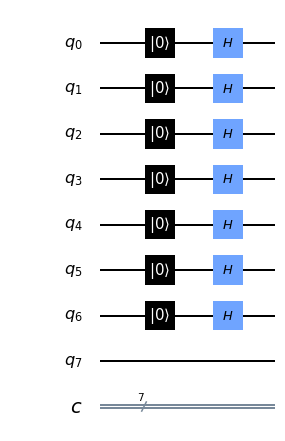

In [416]:
circuit.draw(output='mpl')

In [417]:
# setup special circuit q7 "Control Qubit"
circuit.reset(7)
# applying the X sets the control bit of each cnot to 1
circuit.x(7)
circuit.h(7)

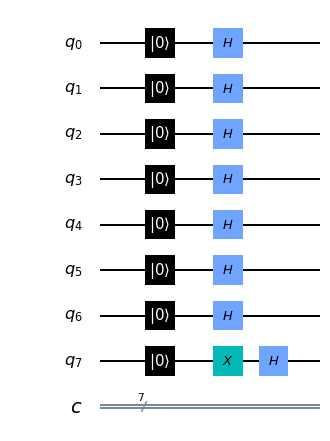

In [418]:
circuit.draw(output='mpl')

In [419]:
circuit.barrier()

In [420]:
# if first number is a 1 then put an Cnot gate on the line.
print("Secret Number is {} \n".format(secret_number))

Secret Number is 1011010 



In [421]:
for i in range( len(secret_number)):
    my_qubit= len(secret_number)-i-1
    if secret_number[i] == "1":
        print("Adding Cnot Gate to Qubit {}".format(my_qubit))
        circuit.cx(my_qubit,len(secret_number))
    else :
        print("No Cnot gate for you Qubit {}".format(my_qubit))

Adding Cnot Gate to Qubit 6
No Cnot gate for you Qubit 5
Adding Cnot Gate to Qubit 4
Adding Cnot Gate to Qubit 3
No Cnot gate for you Qubit 2
Adding Cnot Gate to Qubit 1
No Cnot gate for you Qubit 0


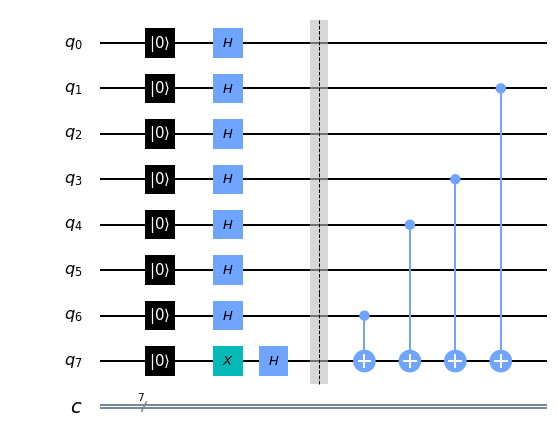

In [422]:
circuit.draw(output='mpl')

In [423]:
# Add Barriers and Hadamard gates to circuits

circuit.barrier()

for i in range(len(secret_number)):
    circuit.h(i)

circuit.barrier()

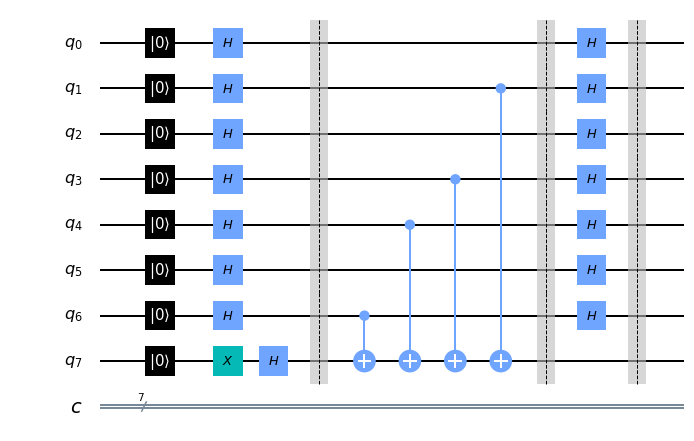

In [424]:
circuit.draw(output='mpl')

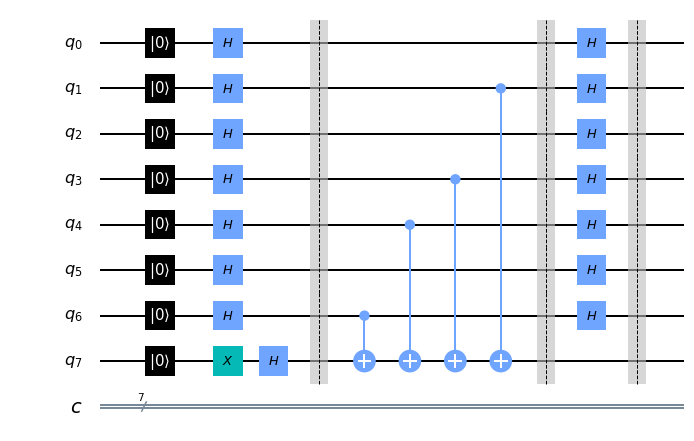

In [425]:
circuit.draw(output='mpl')

In [426]:
circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])

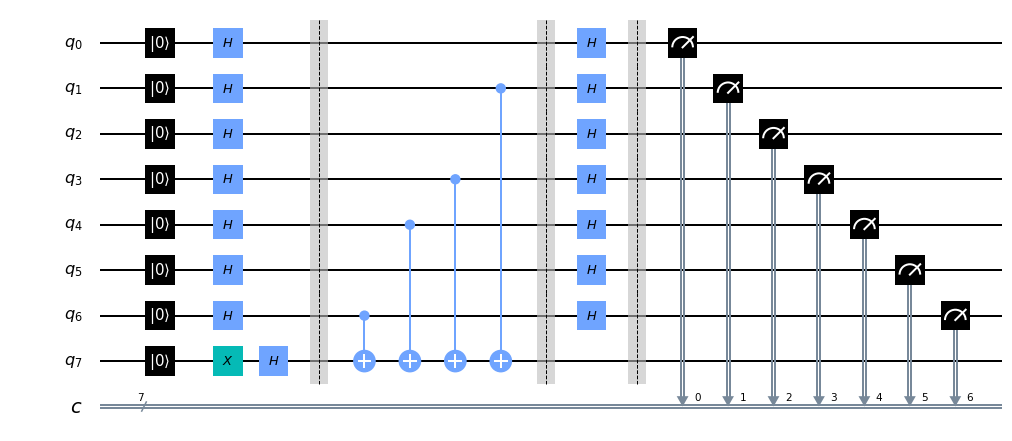

In [427]:
circuit.draw(output='mpl')

In [428]:
# The value of the function on the input qubit (q7)
#  is written to the output qubits q0-q6. 
# 
# The value of q7 is UNCHANGED. 

# q7 the input wire.  
# q0-q6 is the output wire


# This is so we can write non-reversable functions in a reversable way.


In [429]:
simulator = Aer.get_backend('qasm_simulator')

In [430]:
result = execute(circuit, backend = simulator, shots = 1).result()

In [431]:
counts = result.get_counts()

In [432]:
print("Your qauntumly revealed secret number is {} which should equal {}".format(list(counts.keys())[0],secret_number))

Your qauntumly revealed secret number is 1011010 which should equal 1011010
